# Correlation Analysis Report

## Introduction
This report employs Pearson, Spearman, and Phik correlation coefficients to explore relationships within a dataset comprised of photographic elements. Each algorithm contributes uniquely to the analysis:

- **Pearson Correlation**: Evaluates linear relationships between continuous variables, with a sensitivity to outliers and the assumption of normally distributed data.
- **Spearman Correlation**: Measures monotonic relationships, capturing both linear and non-linear associations, suitable for non-parametric data.
- **Phik Correlation**: Adaptable for datasets with mixed variable types, phik correlation is based on the chi-squared statistic, making it applicable to categorical, ordinal, and interval data.

Together, these methodologies provide a nuanced understanding of the interrelationships between photographic parameters.

interval columns not set, guessing: ['ISO', 'ShutterSpeedValue', 'ApertureValue', 'FocalLength', 'MaxAperture', 'Version', 'Hue_Mean', 'Hue_StdDev', 'Hue_Skewness', 'Hue_Kurtosis', 'Hue_Median', 'Hue_25th_Percentile', 'Hue_75th_Percentile', 'Saturation_Mean', 'Saturation_StdDev', 'Saturation_Skewness', 'Saturation_Kurtosis', 'Saturation_Median', 'Saturation_25th_Percentile', 'Saturation_75th_Percentile', 'Value_Mean', 'Value_StdDev', 'Value_Skewness', 'Value_Kurtosis', 'Value_Median', 'Value_25th_Percentile', 'Value_75th_Percentile']


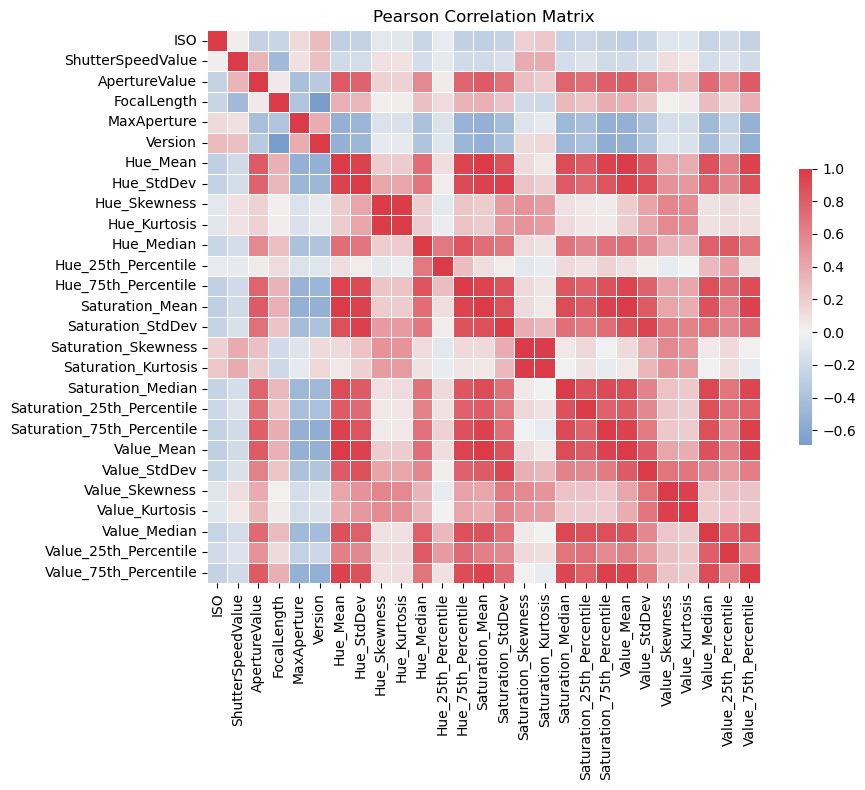

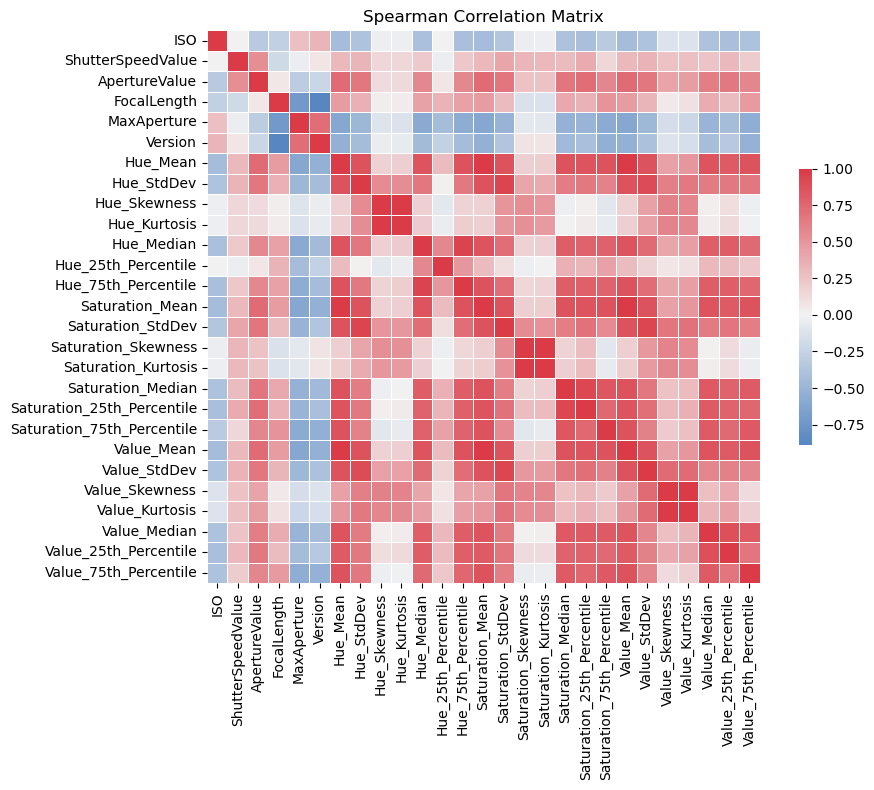

interval columns not set, guessing: ['ISO', 'ShutterSpeedValue', 'ApertureValue', 'FocalLength', 'MaxAperture', 'Version', 'Hue_Mean', 'Hue_StdDev', 'Hue_Skewness', 'Hue_Kurtosis', 'Hue_Median', 'Hue_25th_Percentile', 'Hue_75th_Percentile', 'Saturation_Mean', 'Saturation_StdDev', 'Saturation_Skewness', 'Saturation_Kurtosis', 'Saturation_Median', 'Saturation_25th_Percentile', 'Saturation_75th_Percentile', 'Value_Mean', 'Value_StdDev', 'Value_Skewness', 'Value_Kurtosis', 'Value_Median', 'Value_25th_Percentile', 'Value_75th_Percentile']


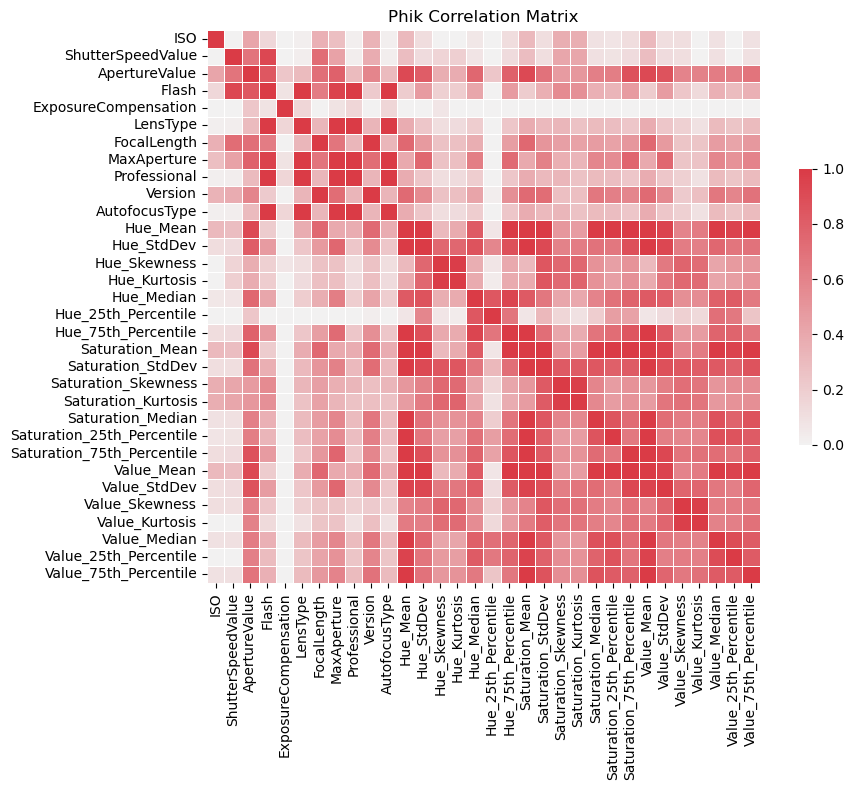

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, chi2_contingency
import phik

df_corr = pd.read_csv('df_corr.csv')

# Calculate Pearson correlation for numerical variables
pearson_corr = df_corr.select_dtypes(include=[np.number]).corr(method='pearson')

# Calculate Spearman correlation for non-linear relationships
spearman_corr = df_corr.select_dtypes(include=[np.number]).corr(method='spearman')

# Phik correlation for mixed data types (numeric and categorical) : Based on Chi-squared Test
phik_corr = df_corr.phik_matrix()

# Define the colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Visualize the Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

# Visualize the Spearman correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Spearman Correlation Matrix")
plt.tight_layout()
plt.show()

# Visualize the Phik correlation matrix
phik_corr = df_corr.phik_matrix()
plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Phik Correlation Matrix")
plt.tight_layout()
plt.show()


## Significant Correlations Identified

### Pearson Correlation Matrix
- **Hue_Mean and ApertureValue (0.83)**: Indicates that aperture adjustments markedly influence hue variations, likely due to light entry angle changes.
- **Version and MaxAperture (0.37)**: Suggests technological advancements align with enhanced maximum aperture capabilities in newer camera models.
- **FocalLength and ShutterSpeedValue (-0.45)**: Longer focal lengths correspond with faster shutter speeds to mitigate motion blur, illustrating an inverse relationship.
- **Saturation_Mean and ApertureValue (0.77)**: Wider apertures appear to elevate saturation levels, possibly due to depth of field effects or augmented luminance.
- **MaxAperture and ApertureValue (-0.41)**: Indicates a tendency to avoid using lenses at their widest aperture settings, likely for greater depth of field or to circumvent optical aberrations.

### Spearman Correlation Matrix
- **ISO and ApertureValue (-0.33)**: Higher light sensitivity correlates with smaller apertures, possibly for light intake control or depth of field enhancement.
- **FocalLength and MaxAperture (-0.73)**: Demonstrates that lenses with extended focal lengths generally possess smaller maximum apertures, characteristic of zoom lenses.
- **Version and FocalLength (-0.89)**: A strong negative correlation implies a shift towards shorter focal lengths in newer models, reflecting preferences for wider angles or compact designs.
- **Hue_Mean and ApertureValue (0.73)**: Affirms that wider apertures influence hue shifts, impacting image composition and colour dynamics.
- **Value_Mean and ApertureValue (0.73)**: Suggests wider apertures not only affect hue but also image brightness, due to heightened light exposure.

### Phik Correlation Matrix
- **ShutterSpeedValue and Flash (0.93)**: Exhibits a strong link between flash use and shutter speed selections, hinting at automatic adjustments in low-light scenarios.
- **ApertureValue and Saturation_75th_Percentile (0.87)**: Implies that wider apertures, facilitating increased light entry, correlate with heightened saturation in the image's brighter areas.
- **ApertureValue and Value_Mean (0.92)**: Confirms that images captured with wider apertures are generally brighter, a consequence of enhanced light reception.
- **Flash and MaxAperture (0.95)**: Indicates a propensity for utilising wider apertures in flash photography, likely for flash brightness balancing.
- **LensType and Flash (1.0)**: Reveals a direct link between specific lens types and flash usage, typical of specialised photography like macro or portrait work.

### Surprising Findings
- **LensType and Flash (1.0, Phik)**: Every time certain lenses are used, flash is also used. This might mean some lenses are always used with flash, like for close-ups or portraits. This was a surprise and we want to look more into it.

## Conclusion
We found out a lot about how different camera settings affect photos. Some things were what we expected, but others were surprising and make us want to learn more. This information can help photographers take better photos and help people making cameras to understand what features are important.